In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools

from describe import loadData, trainDataFilePath


data = loadData(trainDataFilePath())
if data is None:
    exit(1)

df = data

Attempt to convert non numeric data to a numeric form so it can be used for the logistic regression as a feature

**Best Hand** : converted to a binary, 0 and 1

**First and Last Name** : to count of the characters, pretty weak idea

**Birthday** : to age, also pretty weak, presumably a Hufflepuff at 17 is still a Hufflepuff at 50

In [2]:
df["Best Hand"] = df["Best Hand"].map({"Left": 0, "Right": 1})

df['NameLength'] = (df['First Name'] + df['Last Name']).str.len()

ref_date = pd.to_datetime('2025-09-01')
df['Age'] = (ref_date - pd.to_datetime(df['Birthday'])).dt.days / 365.25

**Scatter Plot**

What are the two features that are similar ?

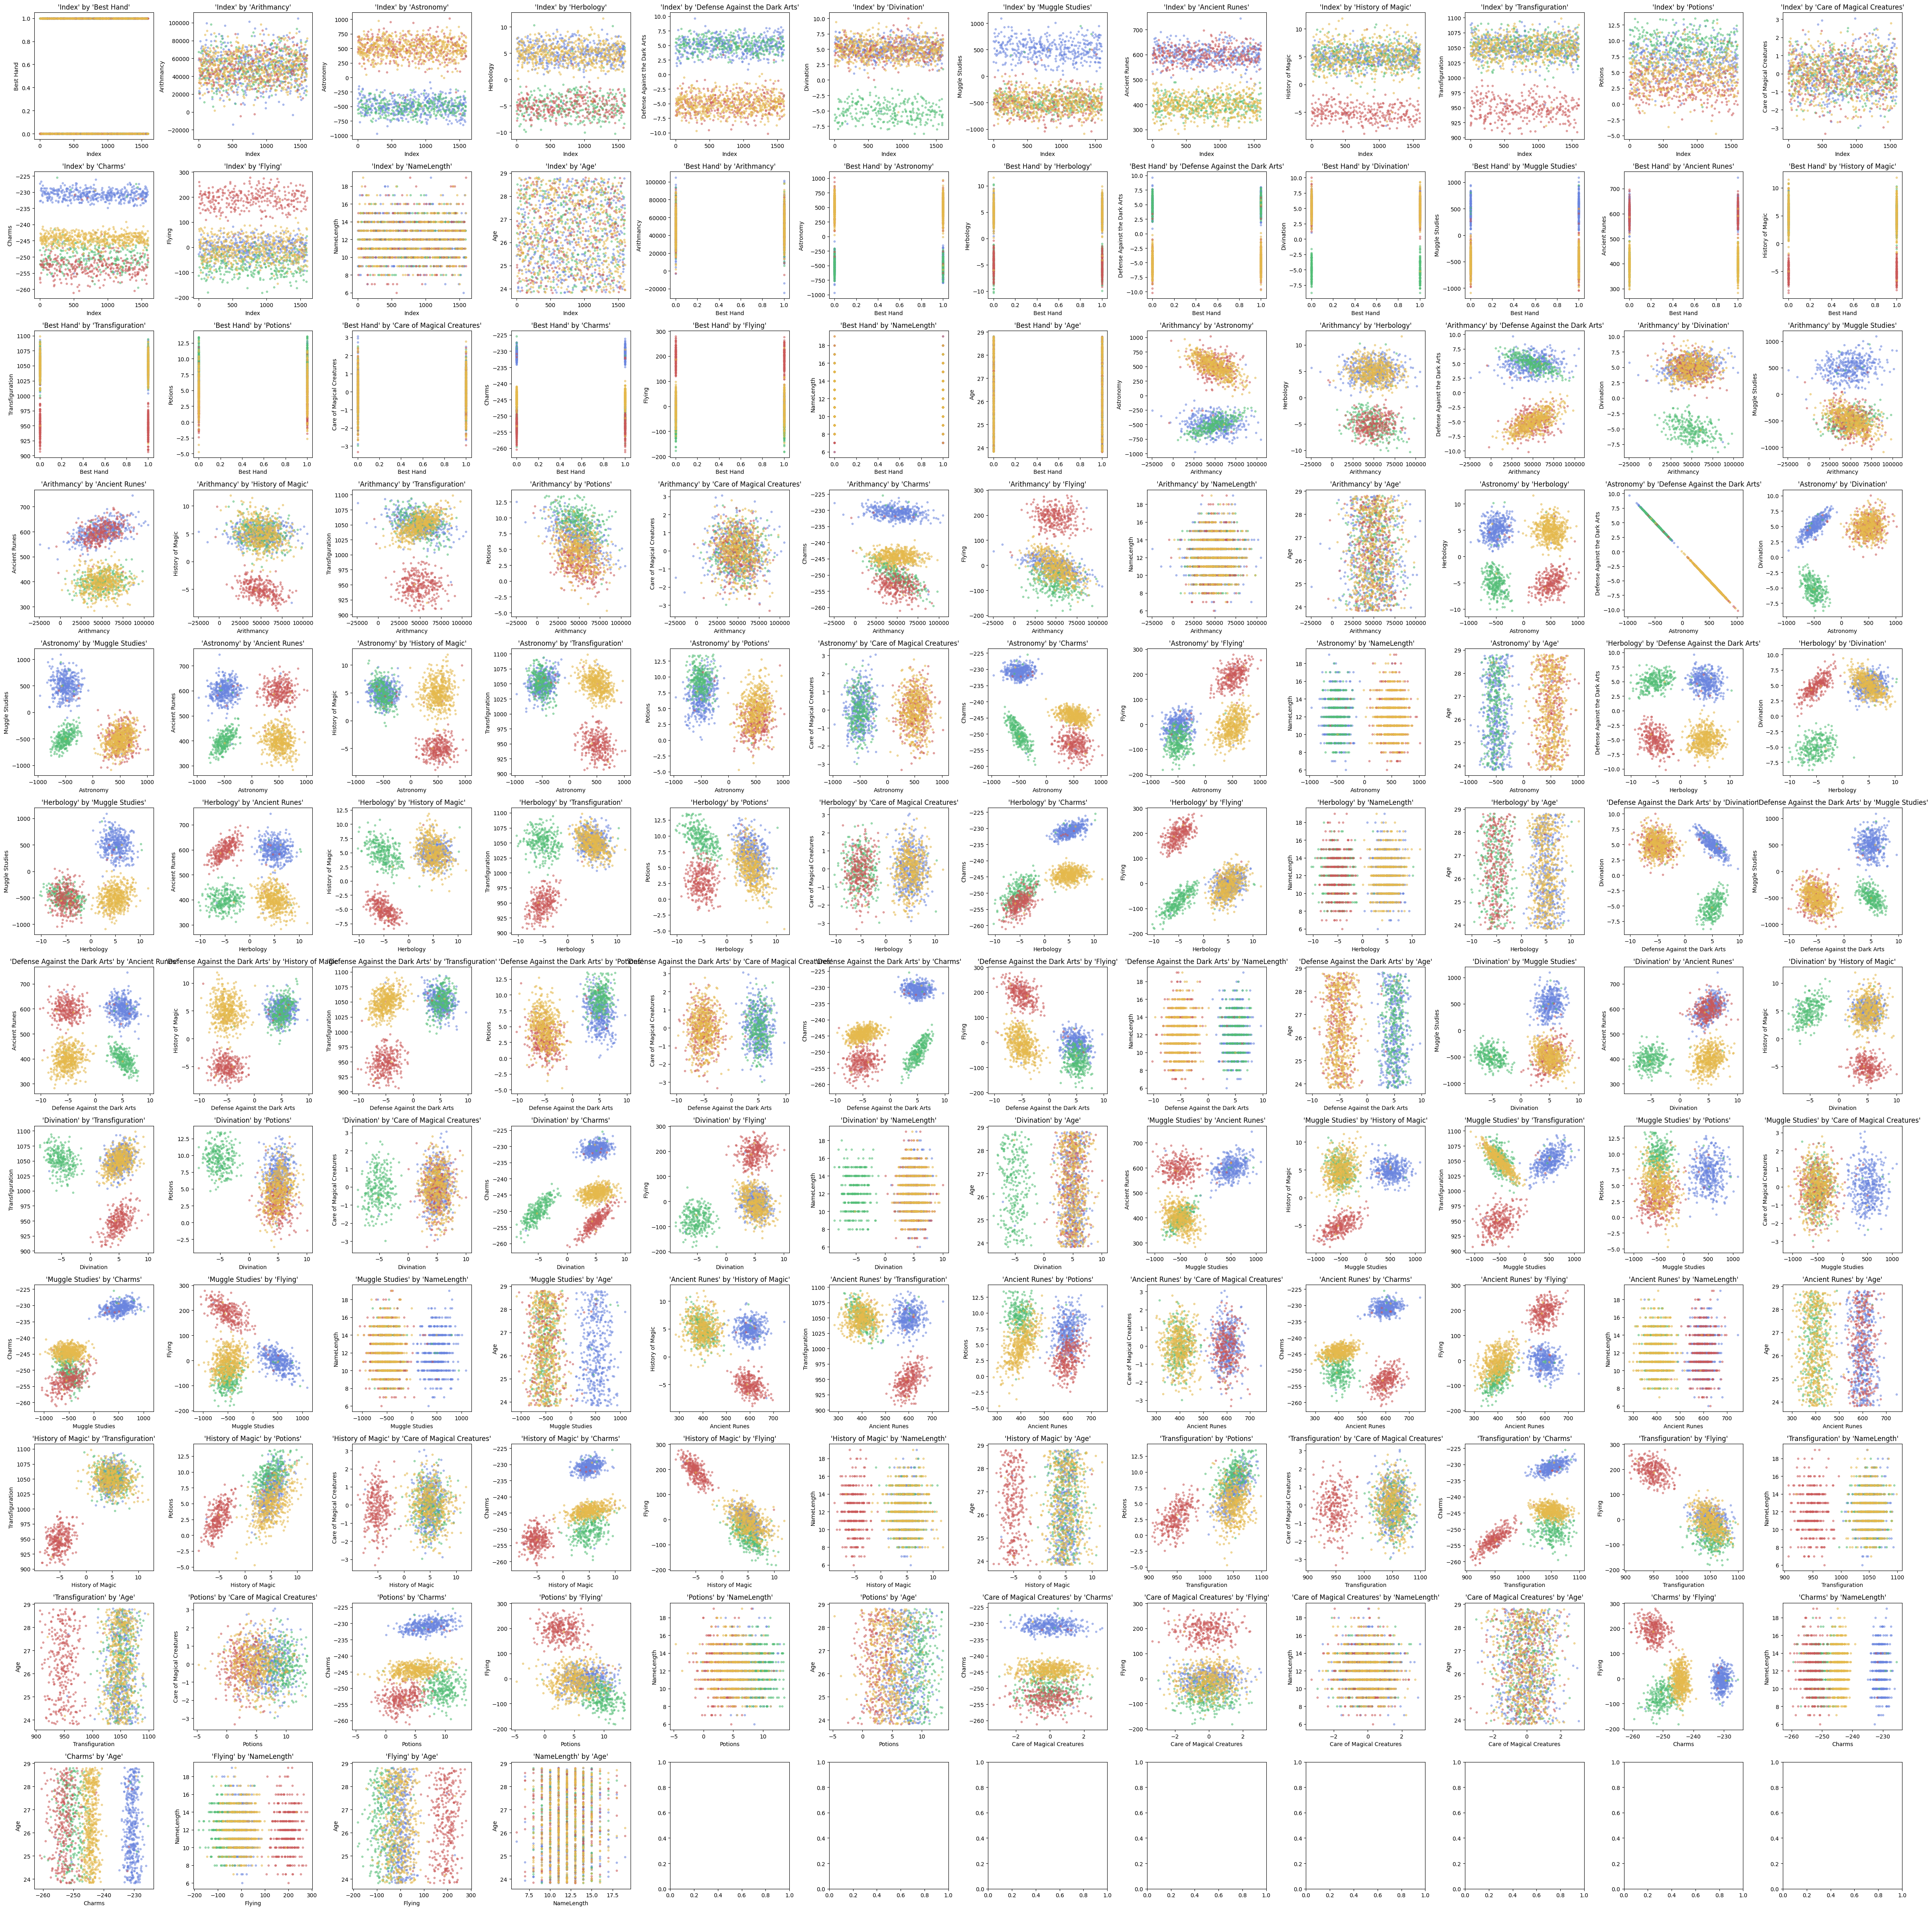

In [3]:
numeric_cols = df.select_dtypes(include='number').columns
all_houses = df["Hogwarts House"].dropna().unique()

house_color_map = {
    'Gryffindor': "#CB5959",
    'Hufflepuff': "#E5B94C",
    'Ravenclaw':  '#6A85DF',
    'Slytherin':  "#52BE76"
}

feature_pairs = list(itertools.combinations(numeric_cols, 2))

num_plots = len(feature_pairs)
cols = math.ceil(math.sqrt(num_plots))
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(cols, rows, figsize=(cols*4, rows*4))

axes = axes.flatten()

for i, (x_feature, y_feature) in enumerate(feature_pairs):
    ax = axes[i]
    for house in all_houses:
        house_bool_maks = df["Hogwarts House"] == house
        x = df[house_bool_maks][x_feature]
        y = df[house_bool_maks][y_feature]
        ax.scatter(x, y, s=10, alpha=0.5, label=house, c=house_color_map[house])
    ax.set_title(f"'{x_feature}' by '{y_feature}'")
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)

plt.tight_layout()
plt.show()

**Index** is rather obviously is useless as a measure, it looks random and homogeneus

**Name Length**, is pretty homogeneus, but follows the bell curve which is interesting

**Age** is as hypothesised useless, it's random and homogeneus

**Best Hand** looks pretty useless, the spread looks homogeneus

...TODO finish this analysis